<a href="https://colab.research.google.com/github/HAN-GEONHUI/test/blob/t_academy_%EC%88%98%EC%97%85_pandas/08_dart_crawling(240829).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#목적: 명확하게 서로 데이터를 주고 받으려면 api를 활용
#      통신http을 활용해서 api서버에 접속하고 요청
#      목적이 명확하게 되어 있어서:속도,코드로 접속
#      단.하루에 할당량/주간 할댱량/월간 할댱량(할당량 별로 돈을 과금)
#      --> api가 아니라 일반적인 사이트에 원하는 정보가 있다.
#      case by case가 심해
#      여러 시도들을 해야함! 숨은 정보들이 있는지 뒤져야 함
#      --> 내가 원하는 정보에 대한 명확한 주소 파악이 가장 중요하다
#       (눈에 보이는 주소는 그대로 사용하면 된다) 하지만 눈에 보이는 곳 말고
#        사이트가 내부적으로 호출/주고 받은 곳을 뒤져야한다.

In [ ]:
#기능적으로 체크
#1) 숨겨져 있는 주소는 어떻게 찾을까? --? 브라우저 개발자 도구
#++ 주소를 바탕으로 브라우저는 컨트롤하는 셀레니움!!
#2) 대상이 일반적인 웹사이트--> html 속에서 필요한 정보를 찾아야 함
#--> beautifulsoup
#3)++ 전체 페이지를 돌아가면서 하는 과정(롤링)

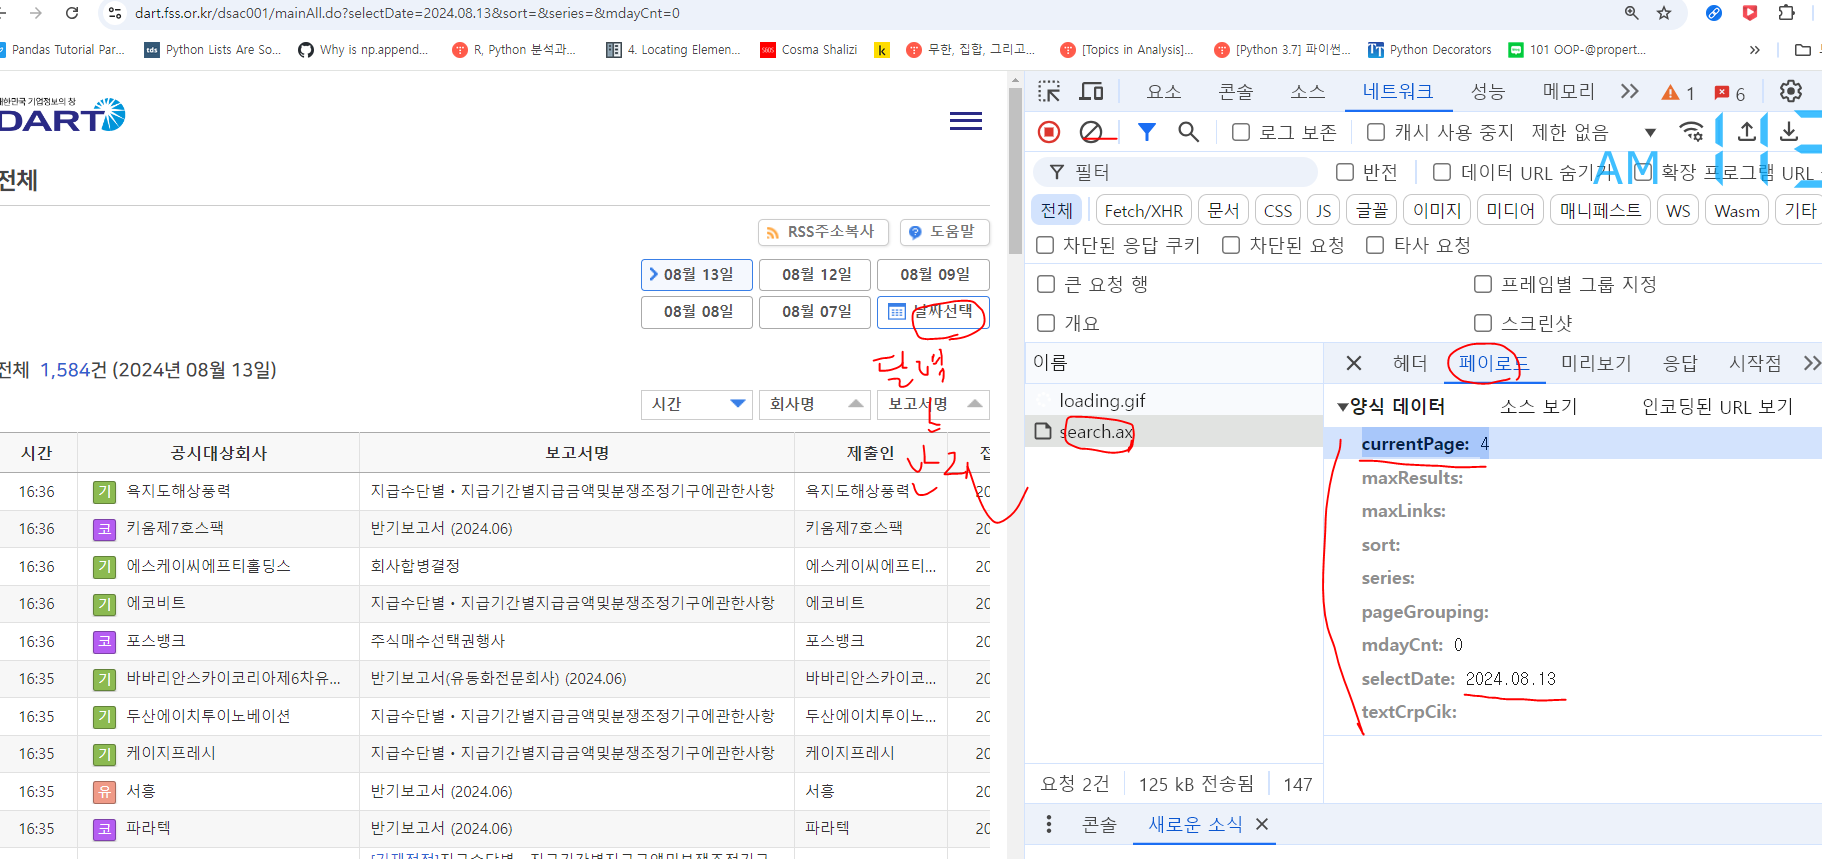

In [ ]:
# ==> 웹 브라우저에서 개발자도구 ==> 네트워크쪽 탐색!
#     실제 사이트와 내 브러우저 사이에 주고 받은 정보들 탐색!!
#     : 우리가 원하는 정보를 주고 받은 실제 정확한 주소!!!
#       + 되는지 안 되는지 체크!!! 실험...여러 뒤져야 하는 경우도 있음.

# Dart:주소만 찾아내면 코드로 접속해서 할 수 있다!!!
# base url : https://dart.fss.or.kr/dsac001/mainAll.do
#++selectDate:요청하려는 날짜 YYYY.MM.DD
#++currentPage: 그 날의 공시 페이지 롤링
#--> 한 번 조립해 볼까
"https://dart.fss.or.kr/dsac001/mainAll.do"+"?selectDate=2024.08.09&currentPage=1"
"https://dart.fss.or.kr/dsac001/mainAll.do"+"?selectDate=2024.08.09&currentPage=3"

'https://dart.fss.or.kr/dsac001/mainAll.do?selectDate=2024.08.09&currentPage=3'

In [ ]:
#필요한 패키지들
#1) 통신:urllib,request etc
import requests
#2) htmㅣ--> tag중심의 언어!
#    html에서 tag중심으로 정보추출,BeautiulilSoup
from bs4 import BeautifulSoup
#3) 데이터처리
import pandas as pd
#4)+++ 데이터 처리하는 과정에서
#  --> 정규식!,시간에 대한 처리
import re
import time

In [ ]:
#step1) 내가 요청하고자 하는 url 완성을 해야함
#--> api는 문서를 보면서 하면 됨
#--> 일반 사이트는 내가 직접 열심히 찾아내야 함
#    (브라우저 개발자 도구-->네트워크)

In [ ]:
#예시 날짜:2024.08.28
#--> 864건의 공시 정보를 요청을 하고 모든것을 DF
#--> 1페이지가 아니라, 여러 페이지를 롤링해야 함
date = '2024.08.28' #<--- selectDate =
page = "1"          #<---- currentPage =
url = f"https://dart.fss.or.kr/dsac001/mainAll.do?selectDate={date}&currentPage={page}"
url

'https://dart.fss.or.kr/dsac001/mainAll.do?selectDate=2024.08.28&currentPage=1'

In [ ]:
#step2) 주소가 완성이 되었다고 하면,, 통신으로 요청
#      --> requests패키지로 요청을 해보겠습니다!
#--> 어제는 FM적으로 params 를 dict로 만들어서 요청
#--> 이번에는 urllib.~urlopen()직접 여는 방식으로 해보자
res = requests.get(url)
res

<Response [200]>

In [ ]:
#참고) resquest 패키지를  통해서 받은 정보를 열어보는 방식 2가지
#      1)res.text: 알아서 자기가 인코딩/디코딩 처리를 함
#                  특별하게 신경쓸 인/디코딩 쪽에서는..
#      2)res.content:이미지,동영상-->바이트값으로 들어옴..
#      참고)res.json():json정보를 파이썬 자료형으로 변형하는 메서드
#--> 일반적인 데이터.text,특별하게(이미지/동영상).content

In [ ]:
res.text

'<!DOCTYPE html>\r\n\r\n\r\n\r\n\n\n\n\n\n\n\n\r\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="ko" lang="ko">\r\n\t<head>\r\n\t\t<title>최근공시</title>\r\n\t\t<meta charset="UTF-8">\r\n\t\t<meta id="Viewport" name="viewport" content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0,user-scalable=yes">\r\n\t\t<meta http-equiv="X-UA-Compatible" content="ie=edge">\r\n\t\t\r\n\r\n\r\n\t\r\n<script type="text/javascript" src="/resource/js/jquery-3.3.1.min.js"></script>\r\n\r\n<link rel="stylesheet" href="/js/jquery-ui/jquery-ui.min.css">\r\n<script type="text/javascript" src="/js/jquery-ui/jquery-ui.min.js"></script>\r\n\r\n<!-- 2011.11.01 ext 2.3 -->\r\n<!--[if lte IE 8]><link rel="stylesheet" type="text/css" href="/js/ext-main/resources/css/ext-all-ie8.css" /><![endif]-->\r\n<script type="text/javascript" src="/js/ext-main/adapter/ext/ext-base.js"></script>\r\n<script type="text/javascript" src="/js/ext-main/ext-all.js"></script>\r\n\r\n<!-- x-xeries js librar

In [ ]:
#위의 요청한 정보들을 쉽게 tag 중심으로 접근하기 위해서 파싱 작업을 해야함 tag 중심:BS
#--> 쌩 텍스트에서 하나 하나 접근하려는 것이 아니라.. tag중심으로 접근하려는 것
soup = BeautifulSoup(res.text, "html.parser")
soup

<!DOCTYPE html>

<html lang="ko" xml:lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>최근공시</title>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0,user-scalable=yes" id="Viewport" name="viewport"/>
<meta content="ie=edge" http-equiv="X-UA-Compatible"/>
<script src="/resource/js/jquery-3.3.1.min.js" type="text/javascript"></script>
<link href="/js/jquery-ui/jquery-ui.min.css" rel="stylesheet"/>
<script src="/js/jquery-ui/jquery-ui.min.js" type="text/javascript"></script>
<!-- 2011.11.01 ext 2.3 -->
<!--[if lte IE 8]><link rel="stylesheet" type="text/css" href="/js/ext-main/resources/css/ext-all-ie8.css" /><![endif]-->
<script src="/js/ext-main/adapter/ext/ext-base.js" type="text/javascript"></script>
<script src="/js/ext-main/ext-all.js" type="text/javascript"></script>
<!-- x-xeries js libraries  -->
<script src="/js/xjs.js?ver=1.18" type="text/javascript"></script>
<!-- application js libraries -->
<script sr

In [ ]:
#-->웹 페이지의 실제 내용(브라우저 상의 페이지 소스코드)
#    이 파이썬으로 soup 하나의 변수에 담아둠
#     이제 할 일:내가 필요한 정보가 어느 tag중심에 있는지 파악해서 접근하는 것

In [ ]:
#참고로 일반적인 사이트에 있어서는
#--> 필요한 정보가 tag 사이에 있을 수 있고,,
#--> tag 속성에 대한 속성값 안에 있을 수도 있음

In [ ]:
# 참고) tag의 속성값을 중심으로 값을 접근!!!
len(soup.find_all("div"))

59

In [ ]:
# 방법1) dict를 통해서 tag 이외의 속성과 속성값을
#        지정해서 정밀하게 정보에 접근하는 방식
soup.find_all("div", {"class":"headTitle"})

[<div class="headTitle">
 <h3 id="subTitle"></h3>
 <ul class="navy" id="path">
 </ul>
 </div>]

In [ ]:
#방법2) tag중에서 bs4에서 이미 파라미터들로 만들어 둠!
#       ex) class 속성에 대해서 :class_
soup.find_all("div",class_="headTitle")

[<div class="headTitle">
 <h3 id="subTitle"></h3>
 <ul class="navy" id="path">
 </ul>
 </div>]

In [ ]:
#Q) 전체 그 날의 공시 자료의 수를 체크!
#--> 내가 몇 개의 페이지를 돌려야 할지 정할 수 있음
#    (이것을 확인하는 방법은 여러가지)
#--> 정규식 사용을 해서,, 규칙을 어떻게 정규식으로 할지 연습
# 테이블 아래에서[1/9][총864건]에서 찾아보겠습니다.

In [ ]:
temp = soup.find_all("div", {"class":"pageInfo"})[0].text
temp

'[1/9] [총 864건]'

In [ ]:
# + 필요한 부분 정규식!!!)
# ==> 정규식은 문자열에서 특정 문자들의 패턴 찾는!!!
#           re.findall(패턴, 어디서)
# ==> 정규식을 가지고 문자열에서 특정 패턴을 변경/제거!!
#           re.sub(패턴,무엇으로 변경할지, 어디)

In [ ]:
# Tyy1) 찾을 패턴 : 숫자들 + 건
temp = re.findall(r"\d+건",temp)[0] # '864건'
temp = re.sub(r"건", "", temp)      # '864'
temp

'864'

In [ ]:
# ===> 위의 temp의 값을 가지고 페이지 수를 계산하겠다..
#      페이지별로 최대 100건의 공시를 보여줌!
#      100으로 나눠서 몫을 올림!
#      100건 ---> 1페이지 : 100/100 = 1
#      101건 ---> 2페이지 : 101/100 = 1.XXXXX  -->올림
#      몫에대한 올림처리!!!
if int(temp) % 100 ==0:
    tot_page = int(temp)//100
else:
    tot_page = int(temp)//100 + 1
# 참고) 파이썬의 올림 연산자/함수를 사용해도 됨!!!
tot_page

9

In [ ]:
#try2) 이번에는 아래 정보에서.../???] --> ???페이지 수 추출
temp= re.findall(r"/\d+\]",temp)[0]
temp

'[1/9] [총 864건]'

In [ ]:
#정규식에서 패턴 구별: 정규식이 미리 지정된 문자를 or 특수문자
#[]: 정규식에서 묶음 ex)[0-9],[a-2]
#[,]: 위의 문자열에서는 정규식의 묶음의 용도가 아니라.. 그냥 단순 괄호의 특수문자!
#--> 파이썬에서 문자열에서 단순 특수문자로 인식시킬 때 :\
temp= re.findall(r"/\d+\]",temp)[0]
temp

'/9]'

In [ ]:
# /, ] 특수문자를 지우면 됨!!!!!
temp = re.sub(r"\/|\]","",temp)
temp

'9'

In [ ]:
##### 필요한 정보(공시관련)들을 추출을 하겠습니다 #####

In [ ]:
# Q) 1개 공시 정보에 대한 정보가 몇 개 있는지 체크

In [ ]:
len(soup.find_all("tr"))

101

In [ ]:
# ==> 순수하게 공시 정보가 담긴 tr은 어떻게 접근할까요?
#     갯수를 카운팅했을 때 : 100개

In [ ]:
soup.find_all("tbody")

[<tbody>
 <tr>
 <td>
 								
 								
 								
 								18:40
 							</td>
 <td class="tL">
 <span class="innerWrap">
 <span class="tagCom_kospi" style="cursor:default" title="유가증권시장">유</span>
 <a href="javascript:openCorpInfoNew('00108746', 'winCorpInfo', '/dsae001/selectPopup.ax');" title="KIB플러그에너지 기업개황 새창">
 										KIB플러그에너지
 									</a>
 </span>
 </td>
 <td class="tL">
 <a href="/dsaf001/main.do?rcpNo=20240828800630" id="r_20240828800630" onclick="openReportViewer('20240828800630'); return false;" title="횡령ㆍ배임혐의발생 공시뷰어 새창">횡령ㆍ배임혐의발생
 									
 		  							
 								</a>
 </td>
 <td class="tL ellipsis" title="KIB플러그에너지">KIB플러그에너지</td>
 <td>2024.08.28</td>
 <td><span class="tagCom_kospi_other" style="cursor:default" title="본 공시사항은 한국거래소 유가증권시장본부 소관임">유</span></td>
 </tr>
 <tr>
 <td>
 								
 								
 								
 								18:31
 							</td>
 <td class="tL">
 <span class="innerWrap">
 <span class="tagCom_kospi" style="cursor:default" title="유가증권시장">유</span>
 <a href="javasc

In [ ]:
len(soup.find("tbody"))

201

In [ ]:
len(soup.find("tbody").find_all("tr"))

100

In [ ]:
soup.find("tbody").find_all("tr")[0]

<tr>
<td>
								
								
								
								18:40
							</td>
<td class="tL">
<span class="innerWrap">
<span class="tagCom_kospi" style="cursor:default" title="유가증권시장">유</span>
<a href="javascript:openCorpInfoNew('00108746', 'winCorpInfo', '/dsae001/selectPopup.ax');" title="KIB플러그에너지 기업개황 새창">
										KIB플러그에너지
									</a>
</span>
</td>
<td class="tL">
<a href="/dsaf001/main.do?rcpNo=20240828800630" id="r_20240828800630" onclick="openReportViewer('20240828800630'); return false;" title="횡령ㆍ배임혐의발생 공시뷰어 새창">횡령ㆍ배임혐의발생
									
		  							
								</a>
</td>
<td class="tL ellipsis" title="KIB플러그에너지">KIB플러그에너지</td>
<td>2024.08.28</td>
<td><span class="tagCom_kospi_other" style="cursor:default" title="본 공시사항은 한국거래소 유가증권시장본부 소관임">유</span></td>
</tr>

In [ ]:
idx = 0 # 내가 보려는 공시 위치
temp = soup.find("tbody").find_all("tr")[idx]
temp

<tr>
<td>
								
								
								
								18:40
							</td>
<td class="tL">
<span class="innerWrap">
<span class="tagCom_kospi" style="cursor:default" title="유가증권시장">유</span>
<a href="javascript:openCorpInfoNew('00108746', 'winCorpInfo', '/dsae001/selectPopup.ax');" title="KIB플러그에너지 기업개황 새창">
										KIB플러그에너지
									</a>
</span>
</td>
<td class="tL">
<a href="/dsaf001/main.do?rcpNo=20240828800630" id="r_20240828800630" onclick="openReportViewer('20240828800630'); return false;" title="횡령ㆍ배임혐의발생 공시뷰어 새창">횡령ㆍ배임혐의발생
									
		  							
								</a>
</td>
<td class="tL ellipsis" title="KIB플러그에너지">KIB플러그에너지</td>
<td>2024.08.28</td>
<td><span class="tagCom_kospi_other" style="cursor:default" title="본 공시사항은 한국거래소 유가증권시장본부 소관임">유</span></td>
</tr>

In [ ]:
#1) 1번 공시의 제출 시간
#--> 안 좋은 공시: 주말,금요일 장 끝나고

In [ ]:
temp.find_all("td")[0]

<td>
								
								
								
								18:40
							</td>

In [ ]:
temp.find_all("td")[0].text

'\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t18:40\r\n\t\t\t\t\t\t\t'

In [ ]:
# + 참고 ) 원하는 정보가 있지만, 눈에 안 보였던 공백이 보이면->공백문자제거하면 됨
#  sol1) strip() : 양쪽에 공백을 제거---> 중간 공백은 노답!!!
#  sol2) 정규식!!!!
# "     18:40        " --> .strip() : "18:40"
# "    18:   40      " --> .strip() : "18:     40"-->정규식!

In [ ]:
t_str_1 = "\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t18:40\r\n\t\t\t\t\t\t\t"
print(t_str_1)


								
								
								
								18:40
							


In [ ]:
t_str_1.strip()

'18:40'

In [ ]:
t_str_2 = "\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t18:\n\n\n\n\n\n\n40\r\n\t\t\t\t\t\t\t"
print(t_str_2)


								
								
								
								18:






40
							


In [ ]:
t_str_2.strip()

'18:\n\n\n\n\n\n\n40'

In [ ]:
re.sub(r"\r|\n|\t|\s","",t_str_2)
# ==> 해당하는 공백이 어디에 있어도 다 제거를 함!!!

'18:40'

In [ ]:
temp.find_all("td")[0].text.strip()

'18:40'

In [ ]:
# 2) 1번 공시를 제출한 회사가 속한 시장을 보고!!!
#    예) 코:코스닥, 유:유가증권, 넥:코넥스, 기:기타법인

In [ ]:
temp.find_all("td")[1].find_all("span")[1]

<span class="tagCom_kospi" style="cursor:default" title="유가증권시장">유</span>

In [ ]:
temp.find_all("td")[1].find_all("span")[1].text

'유'

In [ ]:
temp.find_all("td")[1].find_all("span")[1].get("title")

'유가증권시장'

In [ ]:
# 3) 1번 공시 대상인 회사의 이름을 출력!!!

In [ ]:
temp.find_all("td")[1].text

'\n\n유\n\r\n\t\t\t\t\t\t\t\t\t\tKIB플러그에너지\r\n\t\t\t\t\t\t\t\t\t\n\n'

In [ ]:
temp.find_all("td")[1].text.strip()

'유\n\r\n\t\t\t\t\t\t\t\t\t\tKIB플러그에너지'

In [ ]:
temp.find_all("td")[1].text.strip()[1:].strip()
#-->구질구질한 느낌

'KIB플러그에너지'

In [ ]:
temp.find_all("td")[1].find("a").text.strip()
#최대한 정보들을 바로 접근할 수 있는 tag 중심으로 해야함

'KIB플러그에너지'

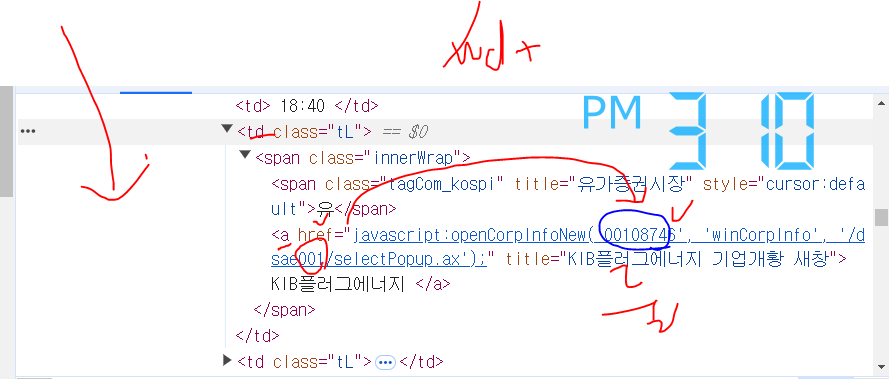

In [ ]:
# 4) 1번 공시 대상인 회사의 코드값을 찾아서 출력!!!!

In [ ]:
temp.find_all("td")[1]

<td class="tL">
<span class="innerWrap">
<span class="tagCom_kospi" style="cursor:default" title="유가증권시장">유</span>
<a href="javascript:openCorpInfoNew('00108746', 'winCorpInfo', '/dsae001/selectPopup.ax');" title="KIB플러그에너지 기업개황 새창">
										KIB플러그에너지
									</a>
</span>
</td>

In [ ]:
temp.find_all("td")[1].find("a")

<a href="javascript:openCorpInfoNew('00108746', 'winCorpInfo', '/dsae001/selectPopup.ax');" title="KIB플러그에너지 기업개황 새창">
										KIB플러그에너지
									</a>

In [ ]:
temp.find_all("td")[1].find("a").get("href")

"javascript:openCorpInfoNew('00108746', 'winCorpInfo', '/dsae001/selectPopup.ax');"

In [ ]:
#==> 회사 코드 값에 대한 규칙: 연속된 8개 숫자.(0포함)
re.findall(r"\d{8}",
          temp.find_all("td")[1].find("a").get("href") )[0]

'00108746'

In [ ]:
#5) 1번 공시 내용을 출력해주세요
temp.find_all("td")[2].text.strip()

'횡령ㆍ배임혐의발생'

In [ ]:
#6) 1번 공시의 코드값을 출력해주세요(rcpNo)

In [ ]:
temp.find_all("td")[2].find("a").get("href")

'/dsaf001/main.do?rcpNo=20240828800630'

In [ ]:
re.findall(r'\d{14}',temp.find_all("td")[2].find("a").get("href"))

['20240828800630']

In [ ]:
#7) 1번 공시에 대한 접수일자

In [ ]:
temp.find_all("td")[4].text.strip()

'2024.08.28'

In [ ]:
#Q1)for문을 이용해서,, 지금 페이지에는 100개 공시 정보가 있음
#--> 제출 시간, 회사가 속한 시장
#    회사의 이름, 회사 코드값, 공시 이름,
#    공시 rcpno, 요청일자

#Q2) 1번에서 출력한 내용들을 DF에 저장을 해보세요!
#--> 컬럼, 이름이나, 담는 스타일은 본인 스타일로 하세요!

#Q3)2024년 8월 28일에 대한 864건에 대한 공시정보를 1개의 df에 담아보세요

#+++ opt) 이것을 함수로 만들어보세요
#         입력: 조회시작일자, 조회 종료일자
#         출력:

In [ ]:
#Q1)for문을 이용해서,, 지금 페이지에는 100개 공시 정보가 있음
#--> 제출 시간, 회사가 속한 시장
#    회사의 이름, 회사 코드값, 공시 이름,
#    공시 rcpno, 요청일자

In [ ]:
# 1) soup : 2024.08.28의 1페이지의 공시정보가 담겨있음.!!
tot_cnt = len(soup.find("tbody").find_all("tr"))
# ==> 정수 인덱스를 중심으로 하겠다!!!
for i in range(tot_cnt):
    temp = soup.find("tbody").find_all("tr")[i]
    # ==> temp는 1개 공시 정보에 대한 내용!!!
    print( temp.find_all("td")[0].text.strip() )
    print(temp.find_all("td")[1].find_all("span")[1].get("title"))
    print(temp.find_all("td")[1].find("a").text.strip())
    print(re.findall( r"\d{8}",
           temp.find_all("td")[1].find("a").get("href"))[0])
    print(temp.find_all("td")[2].text.strip())
    print(re.findall(r'\d{14}',temp.find_all("td")[2].find("a").get("href") )[0])
    print(temp.find_all("td")[4].text.strip())
    print("*"*100)

18:40
유가증권시장
KIB플러그에너지
00108746
횡령ㆍ배임혐의발생
20240828800630
2024.08.28
****************************************************************************************************
18:31
유가증권시장
포스코퓨처엠
00155276
불성실공시법인지정예고
20240828800627
2024.08.28
****************************************************************************************************
18:11
유가증권시장
동부건설
00115612
투자판단관련주요경영사항
20240828800614
2024.08.28
****************************************************************************************************
18:06
코넥스시장
에스알바이오텍
01187458
기업설명회(IR)개최
20240828600582
2024.08.28
****************************************************************************************************
17:59
기타법인
앤오앤농업회사법인
01787319
감사보고서
									 (2023.12)
20240828001005
2024.08.28
****************************************************************************************************
17:59
기타법인
글로벌세아
00247522
[기재정정]대규모기업집단현황공시[연1회공시및1/4분기용(대표회사)]
20240828001004
2024.08.28
*******************************************************

In [ ]:
# 2) soup : 2024.08.28의 1페이지의 공시정보가 담겨있음.!!
for i, temp in enumerate(soup.find("tbody").find_all("tr")):
    print(f"{i+1}번째 공시 정보")
    # ==> temp는 1개 공시 정보에 대한 내용!!!
    print(temp.find_all("td")[0].text.strip() )
    print(temp.find_all("td")[1].find_all("span")[1].get("title"))
    print(temp.find_all("td")[1].find("a").text.strip())
    print(re.findall( r"\d{8}",
           temp.find_all("td")[1].find("a").get("href"))[0])
    #print(temp.find_all("td")[2].text.strip())
    print(re.sub(r"\r|\t|\n","",temp.find_all("td")[2].text.strip()))
    # --> 공시 중에서,,,중간 공백이 있는 친구들이 있어요;;;
    print(re.findall(r'\d{14}',temp.find_all("td")[2].find("a").get("href") )[0])
    print(temp.find_all("td")[4].text.strip())
    print("*"*100)

1번째 공시 정보
18:40
유가증권시장
KIB플러그에너지
00108746
횡령ㆍ배임혐의발생
20240828800630
2024.08.28
****************************************************************************************************
2번째 공시 정보
18:31
유가증권시장
포스코퓨처엠
00155276
불성실공시법인지정예고
20240828800627
2024.08.28
****************************************************************************************************
3번째 공시 정보
18:11
유가증권시장
동부건설
00115612
투자판단관련주요경영사항
20240828800614
2024.08.28
****************************************************************************************************
4번째 공시 정보
18:06
코넥스시장
에스알바이오텍
01187458
기업설명회(IR)개최
20240828600582
2024.08.28
****************************************************************************************************
5번째 공시 정보
17:59
기타법인
앤오앤농업회사법인
01787319
감사보고서 (2023.12)
20240828001005
2024.08.28
****************************************************************************************************
6번째 공시 정보
17:59
기타법인
글로벌세아
00247522
[기재정정]대규모기업집단현황공시[연1회공시및1/4분기용(대표회사)]
20240828001004
2024.08.28
*****

In [ ]:
pd.DataFrame(temp)

,0
0,\n
1,[\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\r\n\...
2,\n
3,"[\n, [\n, [코], \n, [\r\n\t\t\t\t\t\t\t\t\t\tKC..."
4,\n
5,"[\n, [[[기재정정]], 타인에대한채무보증결정\r\n\t\t\t\t\t\t\t\..."
6,\n
7,[KCC건설]
8,\n
9,[2024.08.28]


In [ ]:
#Q3)2024년 8월 28일에 대한 864건에 대한 공시정보를 1개의 df에 담아보세요

In [ ]:
# 1페이지의 모든 정보들을....DF
#  soup : 2024.08.28의 1페이지의 공시정보가 담겨있음.!!
dart_data = []

for i, temp in enumerate(soup.find("tbody").find_all("tr")):
    d_time = temp.find_all("td")[0].text.strip()
    d_market = temp.find_all("td")[1].find_all("span")[1].get("title")
    d_co_name = temp.find_all("td")[1].find("a").text.strip()
    d_co_id = re.findall( r"\d{8}",
           temp.find_all("td")[1].find("a").get("href"))[0]
    d_rcp_name = re.sub(r"\r|\t|\n","",temp.find_all("td")[2].text.strip())
    d_rcp_no = re.findall(r'\d{14}',temp.find_all("td")[2].find("a").get("href") )[0]
    d_req = temp.find_all("td")[4].text.strip()
    # ====> 출력했던 정보들에 대한 변수화 작업!!!!!
    dart_data.append( [d_time, d_market, d_co_name,
                       d_co_id,d_rcp_name,d_rcp_no,d_req])
print("Done!!!")

Done!!!


In [ ]:
len(dart_data)

100

In [ ]:
df_1 = pd.DataFrame(
    data = dart_data,
    columns = ["time","market","co_name","co_id",
               "report_name", "report_code","req_date"]
)
df_1

,time,market,co_name,co_id,report_name,report_code,req_date
0,18:40,유가증권시장,KIB플러그에너지,00108746,횡령ㆍ배임혐의발생,20240828800630,2024.08.28
1,18:31,유가증권시장,포스코퓨처엠,00155276,불성실공시법인지정예고,20240828800627,2024.08.28
2,18:11,유가증권시장,동부건설,00115612,투자판단관련주요경영사항,20240828800614,2024.08.28
3,18:06,코넥스시장,에스알바이오텍,01187458,기업설명회(IR)개최,20240828600582,2024.08.28
4,17:59,기타법인,앤오앤농업회사법인,01787319,감사보고서 (2023.12),20240828001005,2024.08.28
...,...,...,...,...,...,...,...
95,17:08,코스닥시장,케이아이엔엑스,00603348,본점소재지변경,20240828900464,2024.08.28
96,17:08,기타법인,아이비케이캐피탈,00275251,투자설명서(일괄신고),20240828000924,2024.08.28
97,17:07,기타법인,엑시아머티리얼스,00347910,대규모기업집단현황공시[분기별공시(개별회사용)],20240828000923,2024.08.28
98,17:07,기타법인,우리금융캐피탈,00209443,투자설명서(일괄신고),20240828000922,2024.08.28


In [ ]:
df_1.to_csv("2024_08_28_p1.csv", sep=",")

In [ ]:
#2024.08.28 모든 공시 정보의 수가 필요함
#--> 864건의 공시

In [ ]:
date = "2024.08.28" #<-- selecDate =
page = "1"          #<-- currentPage=
url = f"https://dart.fss.or.kr/dsac001/mainAll.do?selectDate={date}&currentPage={page}"
res = requests.get(url)
soup = BeautifulSoup(res.text, "html.parser")
# ==> 이 중에서 몇 페이지 해야하는지 체크1!!
tot_page = soup.find_all("div",{"class":"pageInfo"})[0].text
tot_page = re.findall(r"/\d+\]", tot_page)[0]
tot_page = re.sub(r"/|\]","",tot_page)
tot_page = int(tot_page)
#tot_page

#앞에 내용을 추가하면 for문 한 번 돌때마다 비게 된다.

# 2) 전체 page에 대해서 요청하는 url : 1~~~9페이지
dart_data = []
for page in range(1, tot_page+1):
  url = f"https://dart.fss.or.kr/dsac001/mainAll.do?selectDate={date}&currentPage={page}"
  #print(url) # 위에서 정의했고, page 변수 그대로 사용했기에..
  res = requests.get(url)
  soup = BeautifulSoup(res.text, "html.parser")
  for i, temp in enumerate(soup.find("tbody").find_all("tr")):
    d_time = temp.find_all("td")[0].text.strip()
    d_market = temp.find_all("td")[1].find_all("span")[1].get("title")
    d_co_name = temp.find_all("td")[1].find("a").text.strip()
    d_co_id = re.findall( r"\d{8}",
        temp.find_all("td")[1].find("a").get("href"))[0]
    d_rcp_name = re.sub(r"\r|\t|\n","",temp.find_all("td")[2].text.strip())
    d_rcp_no = re.findall(r'\d{14}',temp.find_all("td")[2].find("a").get("href") )[0]
    d_req = temp.find_all("td")[4].text.strip()
    # ====> 출력했던 정보들에 대한 변수화 작업!!!!!
    dart_data.append( [d_time, d_market, d_co_name,
                        d_co_id,d_rcp_name,d_rcp_no,d_req])
    print(f"{page}공시 정보 {i+1}개처리 완료!!!")

1공시 정보 1개처리 완료!!!
1공시 정보 2개처리 완료!!!
1공시 정보 3개처리 완료!!!
1공시 정보 4개처리 완료!!!
1공시 정보 5개처리 완료!!!
1공시 정보 6개처리 완료!!!
1공시 정보 7개처리 완료!!!
1공시 정보 8개처리 완료!!!
1공시 정보 9개처리 완료!!!
1공시 정보 10개처리 완료!!!
1공시 정보 11개처리 완료!!!
1공시 정보 12개처리 완료!!!
1공시 정보 13개처리 완료!!!
1공시 정보 14개처리 완료!!!
1공시 정보 15개처리 완료!!!
1공시 정보 16개처리 완료!!!
1공시 정보 17개처리 완료!!!
1공시 정보 18개처리 완료!!!
1공시 정보 19개처리 완료!!!
1공시 정보 20개처리 완료!!!
1공시 정보 21개처리 완료!!!
1공시 정보 22개처리 완료!!!
1공시 정보 23개처리 완료!!!
1공시 정보 24개처리 완료!!!
1공시 정보 25개처리 완료!!!
1공시 정보 26개처리 완료!!!
1공시 정보 27개처리 완료!!!
1공시 정보 28개처리 완료!!!
1공시 정보 29개처리 완료!!!
1공시 정보 30개처리 완료!!!
1공시 정보 31개처리 완료!!!
1공시 정보 32개처리 완료!!!
1공시 정보 33개처리 완료!!!
1공시 정보 34개처리 완료!!!
1공시 정보 35개처리 완료!!!
1공시 정보 36개처리 완료!!!
1공시 정보 37개처리 완료!!!
1공시 정보 38개처리 완료!!!
1공시 정보 39개처리 완료!!!
1공시 정보 40개처리 완료!!!
1공시 정보 41개처리 완료!!!
1공시 정보 42개처리 완료!!!
1공시 정보 43개처리 완료!!!
1공시 정보 44개처리 완료!!!
1공시 정보 45개처리 완료!!!
1공시 정보 46개처리 완료!!!
1공시 정보 47개처리 완료!!!
1공시 정보 48개처리 완료!!!
1공시 정보 49개처리 완료!!!
1공시 정보 50개처리 완료!!!
1공시 정보 51개처리 완료!!!
1공시 정보 52개처리 완료!!!
1공시 정보 53개처리 완료!!!
1공

In [ ]:
df_2 = pd.DataFrame(
    data = dart_data,
    columns = ["time","market","co_name","co_id",
               "report_name", "report_code","req_date"]
)
df_2.head()

,time,market,co_name,co_id,report_name,report_code,req_date
0,18:40,유가증권시장,KIB플러그에너지,00108746,횡령ㆍ배임혐의발생,20240828800630,2024.08.28
1,18:31,유가증권시장,포스코퓨처엠,00155276,불성실공시법인지정예고,20240828800627,2024.08.28
2,18:11,유가증권시장,동부건설,00115612,투자판단관련주요경영사항,20240828800614,2024.08.28
3,18:06,코넥스시장,에스알바이오텍,01187458,기업설명회(IR)개최,20240828600582,2024.08.28
4,17:59,기타법인,앤오앤농업회사법인,01787319,감사보고서 (2023.12),20240828001005,2024.08.28


In [ ]:
len(df_2)

864

In [ ]:
df_2.to_csv("2024_08_28_tot.csv", sep=",")